In [1]:
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
def generate_data(w1, w2, sigma1, sigma2, p1, m=2, n=100):
    p2 = 1.0-p1
    prob = np.random.rand(n)
    
    latent_label = (prob<p1)

    p1_prob = latent_label.astype(float)
    p2_prob = 1.0-p1_prob

    p1_x = np.random.multivariate_normal(w1, np.eye(m) * (sigma1**2), size=n).T
    p2_x = np.random.multivariate_normal(w2, np.eye(m) * (sigma2**2), size=n).T

    ret = np.zeros((2, n))
    
    ret[:,np.where(latent_label)[0]] = p1_x[:,np.where(latent_label)[0]]
    ret[:,np.where(latent_label==False)[0]] = p2_x[:,np.where(latent_label==False)[0]]

    return ret, latent_label.astype(int),

In [8]:
M = 2

w1 = np.array([2, 2])
w2 = np.array([1, 1])

sigma1 = 0.7
sigma2 = 0.2

p1 = 2/3

ret, latent_class = generate_data(w1, w2, sigma1, sigma2, p1)

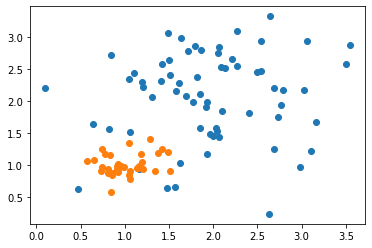

In [9]:
x1 = ret[:, np.where(latent_class==1)[0]]
x2 = ret[:, np.where(latent_class==0)[0]]

plt.scatter(x1[0,:], x1[1,:])
plt.scatter(x2[0,:], x2[1,:])

In [ ]:
def em_clustering(x, init_w):
    